In [1]:
# load and the test weekly fpl scrape
season="2019-20"
gw=9
model_type="nn"

In [2]:
import os
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pickle

Using TensorFlow backend.


In [3]:
os.chdir(os.path.join(os.getcwd(), "..", "..", "data"));

In [4]:
random_state = np.random.seed(24)

In [5]:
X_train = pd.read_csv("x-train.csv");
X_test = pd.read_csv("x-test.csv");
X_val = pd.read_csv("x-val.csv");

In [6]:
y_train = pd.read_csv("y-train.csv");
y_test = pd.read_csv("y-test.csv");
y_val = pd.read_csv("y-val.csv");

In [7]:
print("X train shape: ", X_train.shape)
print("y train shape: ", y_train.shape)

X train shape:  (43116, 68)
y train shape:  (43116, 1)


In [8]:
print("X test shape: ", X_test.shape)
print("y test shape: ", y_test.shape)

X test shape:  (14372, 68)
y test shape:  (14372, 1)


In [9]:
print("X val shape: ", X_val.shape)
print("y val shape: ", y_val.shape)

X val shape:  (14372, 68)
y val shape:  (14372, 1)


In [10]:
# scaler = MinMaxScaler()

In [11]:
# X_train_scaled = scaler.fit_transform(X_train);

In [12]:
# X_val_scaled = scaler.transform(X_val)

In [13]:
def create_mlp(dim, dropout=0.1, l2_reg=0.01, regress=False):
    # define our MLP network
    model = Sequential();
    
    model.add(Dense(8, input_dim=dim, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
    model.add(Dense(7, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
    model.add(Dense(6, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
    model.add(Dense(5, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
    model.add(Dense(4, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
    model.add(Dense(3, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
    model.add(Dense(2, kernel_regularizer=regularizers.l2(l2_reg), activation="elu"));
    model.add(Dropout(dropout));
 
    # check to see if the regression node should be added
    if regress:
        model.add(Dense(1, kernel_regularizer=regularizers.l2(l2_reg), activation="linear"));
 
    # return our model
    return model

In [14]:
model = create_mlp(X_train.shape[1], dropout=0.07, l2_reg=0.07, regress=True)
opt = keras.optimizers.Adam(lr=0.0001)
model.compile(loss="mean_squared_error", optimizer=opt);

W1017 10:31:25.327574 4606776768 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1017 10:31:25.355540 4606776768 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1017 10:31:25.363941 4606776768 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1017 10:31:25.386219 4606776768 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1017 10:31:25.393109 4606776768 deprecati

In [15]:
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=10,
                              verbose=0, mode='auto')

In [16]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=500, shuffle=True, callbacks=[es], verbose=1)

W1017 10:31:26.105390 4606776768 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 43116 samples, validate on 14372 samples
Epoch 1/500
43116/43116 [==============================] - 3s 68us/step - loss: 13.2213 - val_loss: 8.3085
Epoch 2/500
43116/43116 [==============================] - 2s 51us/step - loss: 7.8043 - val_loss: 7.1906
Epoch 3/500
43116/43116 [==============================] - 2s 50us/step - loss: 6.8895 - val_loss: 6.5337
Epoch 4/500
43116/43116 [==============================] - 2s 53us/step - loss: 6.3250 - val_loss: 6.0362
Epoch 5/500
43116/43116 [==============================] - 2s 48us/step - loss: 5.9720 - val_loss: 5.6885
Epoch 6/500
43116/43116 [==============================] - 2s 47us/step - loss: 5.7083 - val_loss: 5.4364
Epoch 7/500
43116/43116 [==============================] - 2s 45us/step - loss: 5.4832 - val_loss: 5.2209
Epoch 8/500
43116/43116 [==============================] - 2s 47us/step - loss: 5.2855 - val_loss: 5.0483
Epoch 9/500
43116/43116 [==============================] - 2s 44us/step - loss: 5.1178 - val_loss: 4.

43116/43116 [==============================] - 2s 45us/step - loss: 4.2332 - val_loss: 4.2528
Epoch 78/500
43116/43116 [==============================] - 2s 46us/step - loss: 4.2406 - val_loss: 4.2511
Epoch 79/500
43116/43116 [==============================] - 2s 47us/step - loss: 4.2274 - val_loss: 4.2515
Epoch 80/500
43116/43116 [==============================] - 2s 45us/step - loss: 4.2293 - val_loss: 4.2498
Epoch 81/500
43116/43116 [==============================] - 2s 48us/step - loss: 4.2291 - val_loss: 4.2498
Epoch 82/500
43116/43116 [==============================] - 2s 45us/step - loss: 4.2385 - val_loss: 4.2500
Epoch 83/500
43116/43116 [==============================] - 2s 44us/step - loss: 4.2413 - val_loss: 4.2487
Epoch 84/500
43116/43116 [==============================] - 2s 45us/step - loss: 4.2255 - val_loss: 4.2522
Epoch 85/500
43116/43116 [==============================] - 2s 48us/step - loss: 4.2319 - val_loss: 4.2505
Epoch 86/500
43116/43116 [========================

In [17]:
# X_test_scaled = scaler.transform(X_test)

In [18]:
# pickle.dump(scaler, open("scaler.sav", 'wb'))

In [19]:
y_true = np.array(y_test["total_points"]);

In [20]:
y_pred = model.predict(X_test);

In [21]:
pred_df = pd.DataFrame({'Actual': y_true.flatten(), 'Predicted': y_pred.flatten()})

In [22]:
def getInRange(actual, predicted, lower_bound=0, upper_bound=1):
    return ((actual - predicted) >= lower_bound) and ((actual - predicted) <= upper_bound)

In [23]:
pred_df["in_range"] = pred_df.apply(lambda row: getInRange(row["Actual"], row["Predicted"], 0, 1), axis=1)

In [24]:
print("In range: {0:.2f}".format(pred_df[pred_df["in_range"] == True].shape[0]/pred_df.shape[0]))

In range: 0.09


In [25]:
pred_df.head(25)

,Actual,Predicted,in_range
0,0.0,2.556983,False
1,2.0,2.663203,False
2,0.0,0.428959,False
3,0.0,0.420198,False
4,0.0,0.428612,False
5,0.0,0.524193,False
6,0.0,0.427868,False
7,7.0,2.606669,False
8,0.0,0.416678,False
9,2.0,2.632698,False


In [26]:
test_df = pred_df.head(25)

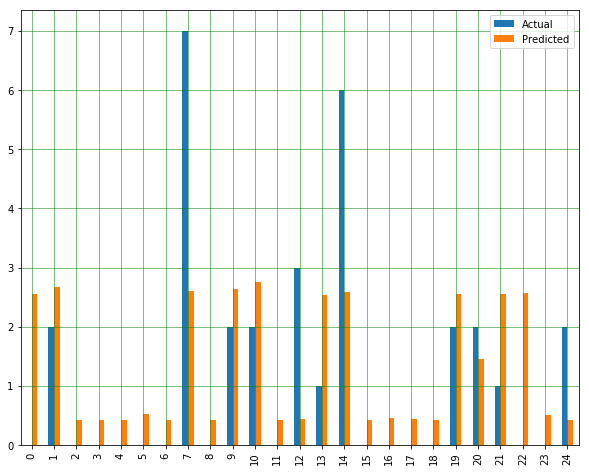

In [27]:
test_df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

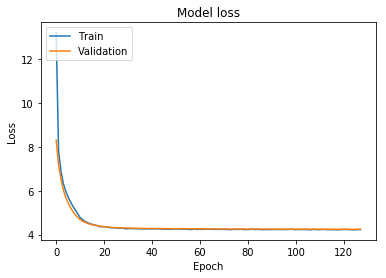

In [28]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.2242489722651484
R2 score: 0.23493160265723356
Mean Squared Error: 3.8098983725057507
Root Mean Squared Error: 1.9518960967494532


In [30]:
filename = '{}-model.h5'.format(model_type)

In [31]:
gw_dir = os.path.join(os.getcwd(), "..", "model", season, str(gw))

In [32]:
if not os.path.exists(gw_dir):
    os.makedirs(gw_dir)

In [33]:
os.chdir(gw_dir)

In [34]:
model.save(filename)